PROYECTO DEL CURSO INTELIGENCIA ARTIFICIAL

In [ ]:
#Importamos las librerias que necesitamos
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Damos permiso para usar archivos de nuestro Drive

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/anime.csv')
df.shape
#Cargamos el data set a usar y vemos sus dimensiones

(17562, 35)

In [ ]:
pd.set_option('display.max_columns',35)
#definimos las columnas para mostra por pantalla

In [ ]:
df.head() 
#vemos los encabezados antes definidos

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [ ]:
df = df.replace('Unknown', float(0))
#hacemos una limpieza de datos reemplazndo string por numero flotante cero para evitar error con el algoritmo

In [ ]:
df.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",0.0,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [ ]:
df=df.drop(['MAL_ID', 'Name', 'Genres', 'English name', 'Japanese name',
       'Type', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],axis=1)

#filtramos solo las variables a usar

In [ ]:
df.head()

,Score,Episodes,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,8.78,26,39,1251960,61971,105808,718161,71513,26678,329800
1,8.39,1,518,273145,1174,4143,208333,1935,770,57964
2,8.24,26,201,558913,12944,29113,343492,25465,13925,146918
3,7.27,26,1467,94683,587,4300,46165,5121,5378,33719
4,6.98,52,4369,13224,18,642,7314,766,1108,3394


In [ ]:
#convertir todos los valores a tipo flotante para que el modelo lo pueda procesar
df=df.astype(float)

In [ ]:
#ver dimensiones del data set final con el que vamos a trabajar
df.shape

(17562, 10)

In [ ]:
#filtro para las variable score la cual es nuestra variable de respuesta
df = df[df.Score > 0.0]


In [ ]:
df.isnull().sum() 

Score            0
Episodes         0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
dtype: int64

In [ ]:
#las  siguiente asignamos valores de respuesta Y y las variables pedictoras.
df.columns

Index(['Score', 'Episodes', 'Popularity', 'Members', 'Favorites', 'Watching',
       'Completed', 'On-Hold', 'Dropped', 'Plan to Watch'],
      dtype='object')

In [ ]:
Y=df.Score

In [ ]:
X=df.drop(['Score'],axis=1)

In [ ]:
Y.head(2)

0    8.78
1    8.39
Name: Score, dtype: float64

In [ ]:
X.head(2)

,Episodes,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,26.0,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0
1,1.0,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0


In [ ]:
Y=Y.astype(float)

In [ ]:
X=X.astype(float)

In [ ]:
Y.shape

(12421,)

In [ ]:
X.shape

(12421, 9)

**Algorimo Regresión Ridge**

In [ ]:
#generamos una lista de 100 valores diferente pora lambda
lambdas= 10**np.linspace(10,2,100)*0.5

In [ ]:
lambdas

array([5.00000000e+09, 4.15108784e+09, 3.44630605e+09, 2.86118383e+09,
       2.37540508e+09, 1.97210303e+09, 1.63727458e+09, 1.35929412e+09,
       1.12850986e+09, 9.36908711e+08, 7.77838072e+08, 6.45774833e+08,
       5.36133611e+08, 4.45107543e+08, 3.69536102e+08, 3.06795364e+08,
       2.54706901e+08, 2.11462144e+08, 1.75559587e+08, 1.45752653e+08,
       1.21006413e+08, 1.00461650e+08, 8.34050269e+07, 6.92443186e+07,
       5.74878498e+07, 4.77274228e+07, 3.96241449e+07, 3.28966612e+07,
       2.73113861e+07, 2.26743925e+07, 1.88246790e+07, 1.56285792e+07,
       1.29751211e+07, 1.07721735e+07, 8.94324765e+06, 7.42484131e+06,
       6.16423370e+06, 5.11765511e+06, 4.24876718e+06, 3.52740116e+06,
       2.92851041e+06, 2.43130079e+06, 2.01850863e+06, 1.67580133e+06,
       1.39127970e+06, 1.15506485e+06, 9.58955131e+05, 7.96141397e+05,
       6.60970574e+05, 5.48749383e+05, 4.55581378e+05, 3.78231664e+05,
       3.14014572e+05, 2.60700414e+05, 2.16438064e+05, 1.79690683e+05,
      

In [ ]:
#dividimos el dataset en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
#definimos nuestro modelo
ridge = Ridge()
coefs = []

for k in lambdas:
    ridge.set_params(alpha=k)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

print(np.shape(coefs))
coefs[0]


(100, 9)


array([ 4.86058915e-06, -1.43423073e-04, -9.56229875e-07, -3.59342960e-06,
        2.25459469e-06,  1.65649684e-06,  4.62792947e-05, -5.58344933e-05,
        4.68787716e-06])

In [ ]:
lambdas.shape

(100,)

In [ ]:
len(coefs)

100

Text(0, 0.5, 'beta')

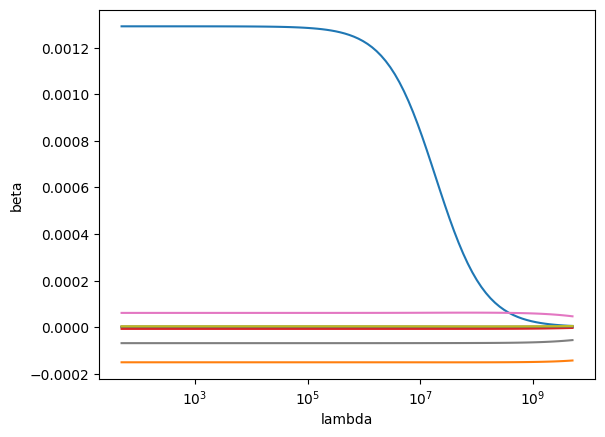

In [ ]:
#se espera que el coheficiente estima esperado se haga mas pequeño mientras el lambda se haga mas grande
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('beta')

Regresión Ridge con λ=4

In [ ]:
#score de nuestras variables alpha=4
mod_ridge4 = Ridge(alpha =4)
mod_ridge4.fit(X_train, Y_train)
print(pd.Series(mod_ridge4.coef_ , index=X.columns))

Episodes         1.291738e-03
Popularity      -1.511535e-04
Members         -8.258051e-07
Favorites       -7.692250e-06
Watching         2.094438e-06
Completed        1.729744e-06
On-Hold          6.097291e-05
Dropped         -6.892429e-05
Plan to Watch    3.414316e-06
dtype: float64


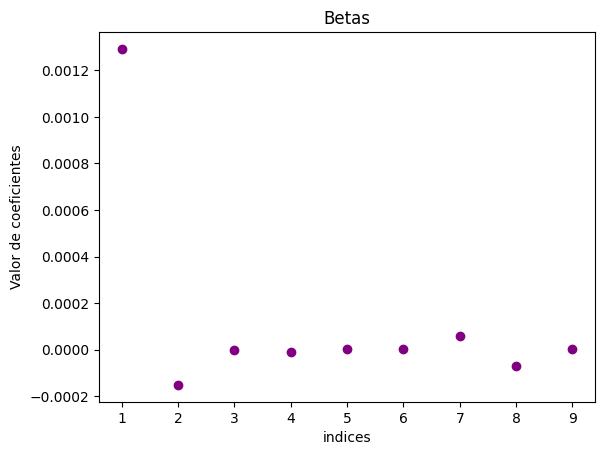

In [ ]:
#valor de las variables o categorias selecionada del data set para nuestro entrenamiento
eje_X = range(1,len(mod_ridge4.coef_)+1,1)
plt.scatter(eje_X, mod_ridge4.coef_, color='purple')
plt.title('Betas')
plt.xlabel('indices')
plt.ylabel('Valor de coeficientes')
plt.show()

In [ ]:
Y_pred = mod_ridge4.predict(X_test)

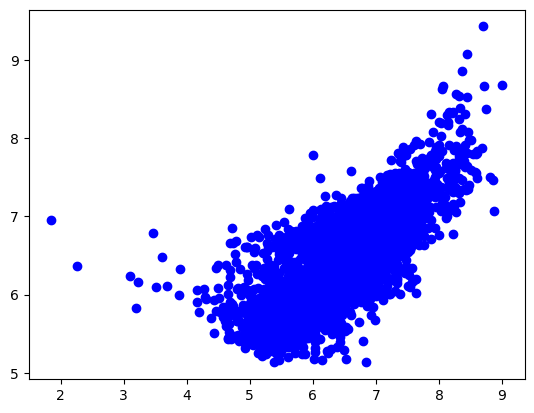

In [ ]:
#Variable de repuesta o prediciones
plt.scatter(Y_test, Y_pred, color='blue')

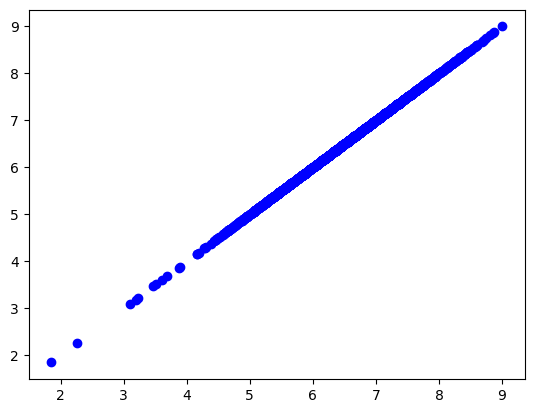

In [ ]:
#Variable estimada
plt.scatter(Y_test, Y_test, color='blue')

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install -y python3-dev libcairo2-dev
!pip install --no-cache-dir --ignore-installed pycairo

In [ ]:
!pip install --no-cache-dir --ignore-installed reportlab


In [ ]:
from Bio.Seq import Seq
from Bio.SeqFeature import SeqFeature, FeatureLocation

from Bio.Graphics import GenomeDiagram
from Bio import SeqIO

secuencia = "ATCGATCGATCGATCG"
seq_obj = Seq(secuencia)

gd_diagram = GenomeDiagram.Diagram("My DNA Sequence")
gd_track = gd_diagram.new_track(1, name="Sequence")
gd_feature_set = gd_track.new_set()
gd_feature = gd_feature_set.add_feature(SeqFeature(FeatureLocation(0, len(seq_obj))), color="blue")

gd_diagram.draw(format="linear", orientation="landscape", pagesize='A4', fragments=1,start=0, end=len(seq_obj))
gd_diagram.write("dna_sequence.png", "PNG")

In [ ]:
from Bio.Seq import Seq
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from PIL import Image

from IPython.display import display

secuencia = "ATCGATCGATCGATCG"
seq_obj = Seq(secuencia)

gd_diagram = GenomeDiagram.Diagram("My DNA Sequence")
gd_track = gd_diagram.new_track(1, name="Sequence")
gd_feature_set = gd_track.new_set()
gd_feature = gd_feature_set.add_feature(SeqFeature(FeatureLocation(0, len(seq_obj))), color="blue")

gd_diagram.draw(format="linear", orientation="landscape", pagesize='A4', fragments=1,start=0, end=len(seq_obj))
gd_diagram.write("dna_sequence.png", "PNG")

display(Image(filename="dna_sequence.png"))



TypeError: ignored